In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
%matplotlib inline

In [2]:
train_path = "data_train.csv"
test_path = "data_test.csv"


In [3]:
import csv
train_data = []
test_data = []

f = open(train_path, 'r')
rdf = csv.reader(f)
for line in rdf:
    cvtline = []
    for word in line:
        cvtword = word.replace("'","")
        cvtline.append(cvtword)
    train_data.append(cvtline)

f = open(test_path, 'r')
rdf = csv.reader(f)
for line in rdf:
    cvtline = []
    for word in line:
        cvtword = word.replace("'","")
        cvtline.append(cvtword)
    test_data.append(cvtline)

train_data = np.array(train_data).astype(np.float)
test_data = np.array(test_data).astype(np.float)
train_data = np.transpose(train_data).astype(np.float)
test_data = np.transpose(test_data).astype(np.float)

In [4]:
x_train = train_data[:][0]
y_train = train_data[:][1]
z_train = train_data[:][2]
h_train = train_data[:][3]
x_test = test_data[:][0]
y_test = test_data[:][1]
z_test = test_data[:][2]
h_test = test_data[:][3]

In [14]:
#defining functions
def Linear_Model(x, y, z, theta0, theta1, theta2,theta3): #Linear function
    return (theta0 + theta1 * x + theta2 * y + theta3 * z)


def Objective_Function(x_data,y_data,z_data, h_data, theta0, theta1, theta2, theta3):#object function (loss function)
    result = 0
    for i in range(len(x_data)):
        result += (Linear_Model(x_data[i],y_data[i],z_data[i], theta0, theta1, theta2, theta3) - h_data[i])**2
    result /= 2* len(x_data)
    return result


def Gradient_Descent(m, lr, x_data,y_data,z_data, h_data, theta0, theta1, theta2, theta3): # derivative of loss funciton 
    temp = 0
    for i in range(m):
        temp += Linear_Model(x_data[i],y_data[i],z_data[i], theta0, theta1, theta2, theta3) - h_data[i]
    new_theta0 = theta0 - lr * temp / m
    
    temp = 0
    for i in range(m):
        temp += (Linear_Model(x_data[i],y_data[i],z_data[i], theta0, theta1, theta2, theta3) - h_data[i])*x_data[i]
    new_theta1 = theta1 - lr * temp / m
    
    temp = 0
    for i in range(m):
        temp += (Linear_Model(x_data[i],y_data[i],z_data[i], theta0, theta1, theta2, theta3) - h_data[i])*y_data[i]
    new_theta2 = theta2 - lr * temp / m
    
    temp = 0
    for i in range(m):
        temp += (Linear_Model(x_data[i],y_data[i],z_data[i], theta0, theta1, theta2, theta3) - h_data[i])*z_data[i]
    new_theta3 = theta3 - lr * temp / m
    
    theta0 = new_theta0
    theta1 = new_theta1
    theta2 = new_theta2
    theta3 = new_theta3
    #theta values updated simultaneously, after calculation
    
    return theta0, theta1, theta2, theta3

In [138]:
theta0, theta1, theta2, theta3 = np.random.rand(4) #initializing theta
m = len(x_train) # number of samples
lr = 0.00002 #learning rate

#contain values with lists
train_loss = []
test_loss = []
t0 = [] 
t1 = []
t2 = []
t3 = []

itermax = 10000
itercount = 0
while True: # changing theta values using gradient descent
    
    t0.append(theta0)
    t1.append(theta1)
    t2.append(theta2)
    t3.append(theta3)
    
    if itercount >= itermax: #if more than 1000 iter, break the loop
        break
    
    train_loss.append(Objective_Function(x_train,y_train,z_train,h_train, theta0, theta1,theta2,theta3))
    test_loss.append(Objective_Function(x_test,y_test,z_test,h_test, theta0, theta1,theta2,theta3))
    
    theta0, theta1, theta2, theta3 = Gradient_Descent(m,lr,x_train,y_train,z_train,h_train,theta0,theta1,theta2,theta3) #updated by train data

    if len(train_loss) > 2 and abs(train_loss[-1] - train_loss[-2]) < 0.001: #check if the value converges by looking train loss change
        break
    
    itercount += 1
    

In [143]:
print(itercount)

3598


# Plotting the estimated parameters

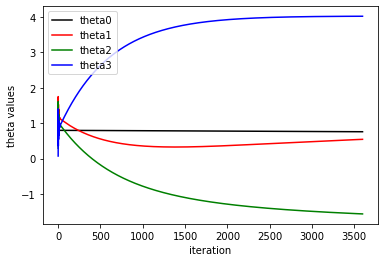

In [145]:
step = np.arange(0,itercount+1,1)
plt.plot(step, t0, c = 'k', label = 'theta0')
plt.plot(step, t1, c = 'r', label = 'theta1')
plt.plot(step, t2, c = 'g', label = 'theta2')
plt.plot(step, t3, c = 'b', label = 'theta3')
plt.legend()
plt.xlabel("iteration")
plt.ylabel("theta values")
plt.show()

# Plotting the training error

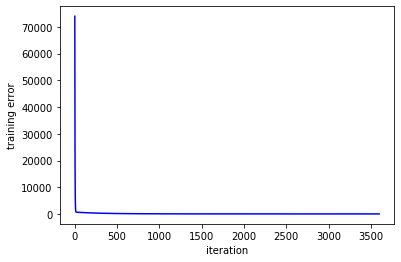

In [158]:
plt.plot(step, train_loss, c= 'b')
plt.xlabel("iteration")
plt.ylabel("training error")
plt.show()

In [161]:
print(train_loss[0], train_loss[-1])

73916.40670194964 105.1746461238113


# Plotting the testing error

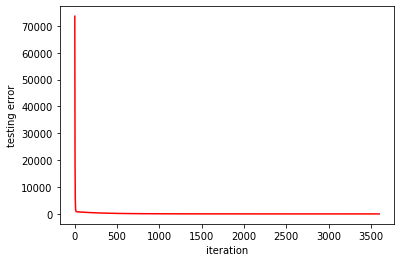

In [163]:
plt.plot(step, test_loss, c= 'r')
plt.xlabel("iteration")
plt.ylabel("testing error")
plt.show()

In [164]:
print(test_loss[0], test_loss[-1])

73556.07000537806 3.8890595777230805
